# QCoDeS Example with with Keithley 2600

In [32]:
import qcodes as qc
import matplotlib.pyplot as plt
from qcodes.instrument_drivers.tektronix.Keithley_2600_channels import Keithley_2600
from qcodes.dataset.plotting import plot_dataset
from qcodes.dataset.sqlite.database import initialise_database
from qcodes.dataset.experiment_container import new_experiment
from qcodes.utils.dataset.doNd import do0d


In [2]:
# Create a station to hold all the instruments

station = qc.Station()

# instantiate the Keithley and add it to the station

keith = Keithley_2600('keithley', 'USB0::0x05E6::0x2614::4305420::INSTR')
station.add_component(keith)

Connected to: Keithley Instruments Inc. 2614B (serial:4305420, firmware:3.2.2) in 0.92s


'keithley'

The Keithley 2600 has two channels, here called `smua` and `smub` in agreement with the instrument manual.

The two channels are basically two separate instruments with different integration times (`nplc`), operation modes (`mode`) etc.

## Fast IV or VI curves

Onboard the Keithley 2600 sits a small computer that can interpret `Lua` scripts. This can be used to make fast IV- or VI-curves and is supported by the QCoDeS driver. To make IV- or VI-curves the driver has the function doFastSweep, which have 3 modes: 'IV','VI' and 'VIfour'.  The Modes 'IV' and 'VI'are two probe measurements, while the mode 'VIfour' makes a four probe measuremnt.

Let's make a fast V(I) curve by sweeping the current from 0.001 A to 0.01 A in 500 steps, using a four probe setup
(when making this notebook, nothing was connected to the instrument, so we just measure noise)

Starting experimental run with id: 161. 


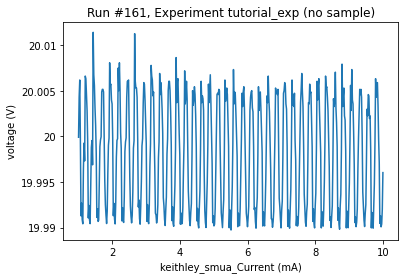

In [26]:
keith.smua.fastsweep.prepareSweep(0.001, 0.01, 500, mode='VIfourprobe')
a = do0d(keith.smua.fastsweep, do_plot = True)
keith.smua.output('off')                         

Let's  export the data to a xarray

In [31]:
xa = a[0].to_xarray_dataset()

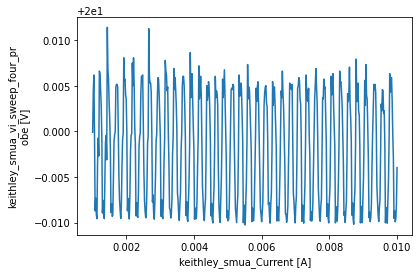

In [33]:
fig, ax = plt.subplots(1,1)
xa.keithley_smua_vi_sweep_four_probe.plot()

Let's swap the dims

In [34]:
ax = xa.swap_dims({"keithley_smua_Current":"keithley_smua_vi_sweep_four_probe"})

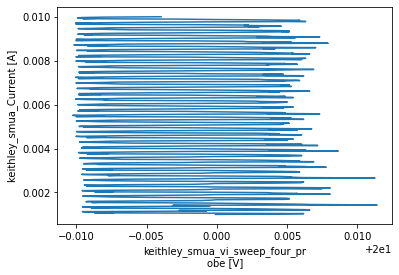

In [35]:
ax.keithley_smua_Current.plot()

In [42]:
ax.keithley_smua_Current.values

array([0.001     , 0.00101804, 0.00103607, 0.00105411, 0.00107214,
       0.00109018, 0.00110822, 0.00112625, 0.00114429, 0.00116232,
       0.00118036, 0.0011984 , 0.00121643, 0.00123447, 0.00125251,
       0.00127054, 0.00128858, 0.00130661, 0.00132465, 0.00134269,
       0.00136072, 0.00137876, 0.00139679, 0.00141483, 0.00143287,
       0.0014509 , 0.00146894, 0.00148697, 0.00150501, 0.00152305,
       0.00154108, 0.00155912, 0.00157715, 0.00159519, 0.00161323,
       0.00163126, 0.0016493 , 0.00166733, 0.00168537, 0.00170341,
       0.00172144, 0.00173948, 0.00175752, 0.00177555, 0.00179359,
       0.00181162, 0.00182966, 0.0018477 , 0.00186573, 0.00188377,
       0.0019018 , 0.00191984, 0.00193788, 0.00195591, 0.00197395,
       0.00199198, 0.00201002, 0.00202806, 0.00204609, 0.00206413,
       0.00208216, 0.0021002 , 0.00211824, 0.00213627, 0.00215431,
       0.00217234, 0.00219038, 0.00220842, 0.00222645, 0.00224449,
       0.00226253, 0.00228056, 0.0022986 , 0.00231663, 0.00233